In [54]:
!pip install catboost
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool, metrics, cv
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from sklearn.datasets import load_breast_cancer
from catboost.datasets import titanic
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
train_df, test_df = titanic()
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

def bin(s):
  if str(s) == "male":
    return 1
  else:
    return 0
train_df['Sex'] = train_df.Sex.apply(bin)


X = train_df.loc[:,['Pclass','Age','Sex','SibSp','Parch','Fare']]
y = train_df['Survived']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
X_test = test_df

clf = DecisionTreeClassifier(max_depth=4, random_state=0) 
clf = clf.fit(X_train, y_train)

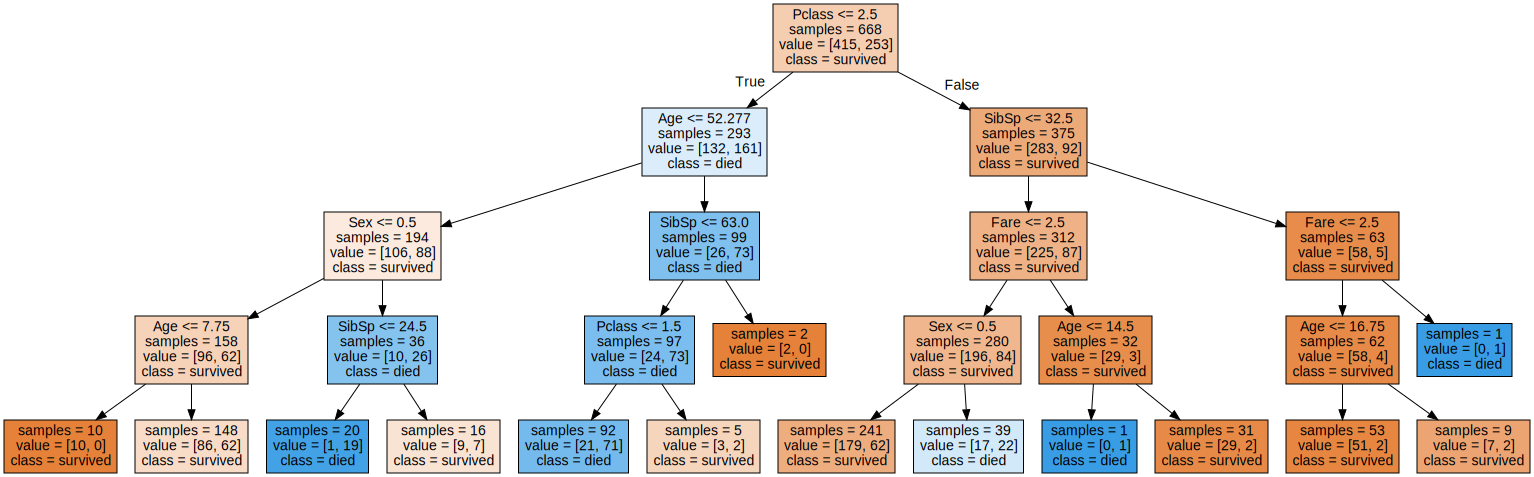

In [36]:
tit_feature_names = ['Pclass','SibSp', 'Parch','Fare','Sex','Age']
export_graphviz(clf, out_file="tree.dot", class_names=["survived", "died"], 
                feature_names=tit_feature_names, impurity=False, filled=True)

import graphviz 
with open("tree.dot") as f: 
    dot_graph = f.read() 
graphviz.Source(dot_graph)

In [37]:
print("Важности признаков:\n{}".format(clf.feature_importances_)) 

Важности признаков:
[0.41914933 0.1460488  0.         0.0550057  0.16768987 0.2121063 ]


In [38]:
for name, score in zip(tit_feature_names, clf.feature_importances_): 
    print(name, score)

Pclass 0.4191493291742399
SibSp 0.1460487973072813
Parch 0.0
Fare 0.05500569995133975
Sex 0.16768987352969336
Age 0.21210630003744574


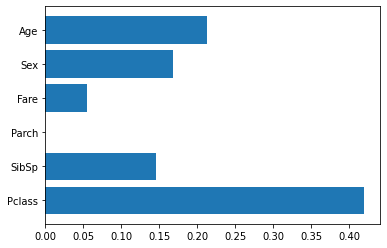

In [40]:
def plot_feature_importances_cancer(model): 
    n_features = train_df.shape[1] 
    plt.barh(range(6), model.feature_importances_, align='center') 
    plt.yticks(np.arange(6),tit_feature_names) 
 
plot_feature_importances_cancer(clf)

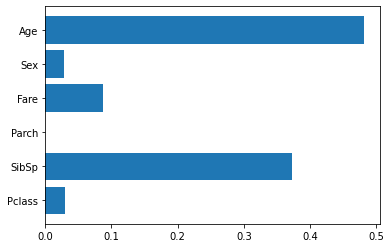

In [41]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=44)
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)
def plot_feature_importances_cancer(model): 
    n_features = train_df.shape[1] 
    plt.barh(range(6), model.feature_importances_, align='center') 
    plt.yticks(np.arange(6),tit_feature_names) 
    
plot_feature_importances_cancer(clf1)

In [45]:
categorical_features_indices = np.where(X.dtypes != float)[0]
model = CatBoostClassifier(custom_loss=[metrics.Accuracy()],random_seed=42,logging_level='Silent')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:

print('Train: {:.4}'.format(
    accuracy_score(y_validation, clf.predict(X_validation))
))
print('Test: {:.4}'.format(
    accuracy_score(y_validation, clf1.predict(X_validation))
))

Train: 0.713
Test: 0.6323


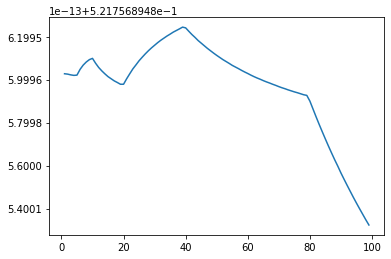

In [58]:
a, b, c = [],[],[]
for i in range(1,100):
  a.append(i)
  for j in range(1,100):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=j)
    clf1 = DecisionTreeClassifier(max_depth=i)
    clf1 = clf1.fit(X_train, y_train)
    c.append(accuracy_score(y_validation, clf1.predict(X_validation)))
  b.append(sum(c)/len(c))

    
plt.plot(a,b)
plt.show()

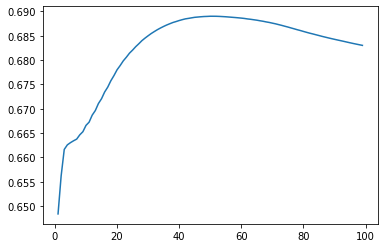

In [61]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2].astype('int')
raw_df.fillna(-999, inplace=True)

a = []
b = []
c = []
for i in range(1,100):
  a.append(i)
  for j in range(1,100):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=j)
    clf1 = KNeighborsClassifier(n_neighbors=i)
    clf1 = clf1.fit(X_train, y_train)
    c.append(accuracy_score(y_validation, clf1.predict(X_validation)))
  b.append(sum(c)/len(c))

plt.plot(a,b)
plt.show()

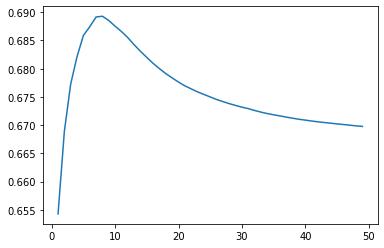

In [62]:
a, b, c = [], [], []
for i in range(1,50):
  a.append(i)
  for j in range(1,100):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=j)
    clf1 = DecisionTreeClassifier(max_depth=i)
    clf1 = clf1.fit(X_train, y_train)
    c.append(accuracy_score(y_validation, clf1.predict(X_validation)))
  b.append(sum(c)/len(c))

plt.plot(a,b)
plt.show()